In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from seaborn import objects as so

data_train = pd.read_csv(filepath_or_buffer="../data/interim/train_for_visu.csv")

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
data_train

,IdPasajero,Condicion,Clase,Genero,Edad,#Hermanos o conyuges a bordo,#Padres o hijos a bordo,Ticket,Tarifa,Cabina,Puerto de embarcacion,Rango etario
0,1,Fallecido,Tercera,Hombre,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Juventud
1,2,Sobreviviente,Primera,Mujer,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adultez
2,3,Sobreviviente,Tercera,Mujer,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adultez
3,4,Sobreviviente,Primera,Mujer,35.0,1,0,113803,53.1000,C123,Southampton,Adultez
4,5,Fallecido,Tercera,Hombre,35.0,0,0,373450,8.0500,NaN,Southampton,Adultez
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Fallecido,Segunda,Hombre,27.0,0,0,211536,13.0000,NaN,Southampton,Adultez
887,888,Sobreviviente,Primera,Mujer,19.0,0,0,112053,30.0000,B42,Southampton,Juventud
888,889,Fallecido,Tercera,Mujer,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton,Desconocido
889,890,Sobreviviente,Primera,Hombre,26.0,0,0,111369,30.0000,C148,Cherbourg,Adultez


## Relación entre cada atributo y el objetivo


### Cantidad de sobrevivientes y fallecidos


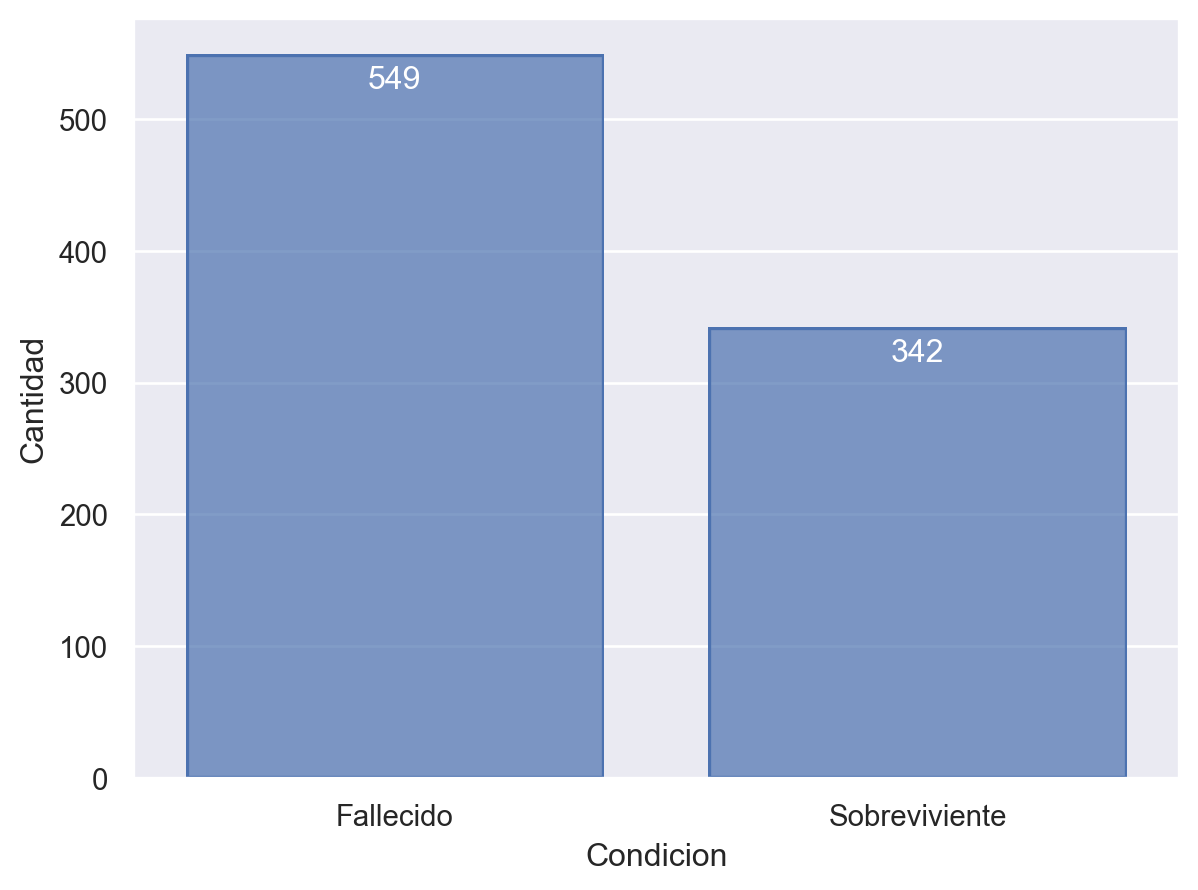

In [8]:
so.Plot(
    data=data_train.loc[:, ["Condicion"]]
    .groupby(by="Condicion")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Condicion",
    y="Cantidad",
    text="Cantidad",
).add(so.Bar()).add(so.Text(color="white", valign="top"))

Hay una cantidad de fallecidos que supera a la cantidad de sobrevivientes. Se recomienda hacer un recorte del set de entrenamiento tal que estos valores esten balanceados


### Cantidad de pasajeros por clase


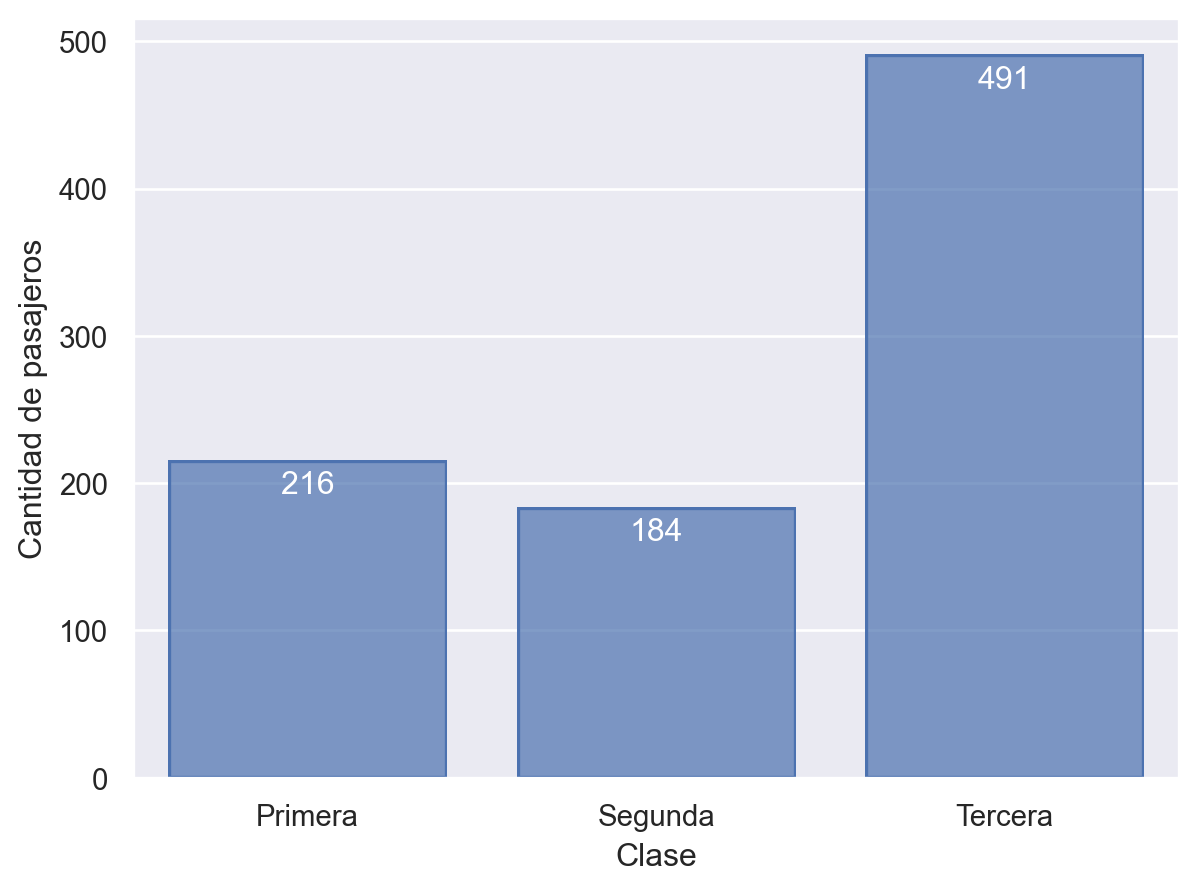

In [ ]:
so.Plot(
    data=data_train.loc[:, ["Clase"]]
    .groupby(by="Clase")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Clase",
    y="Cantidad",
    text="Cantidad",
).add(so.Bar()).add(so.Text(valign="top", color="w")).label(y="Cantidad de pasajeros")

### Cantidad de sobrevivientes por clase


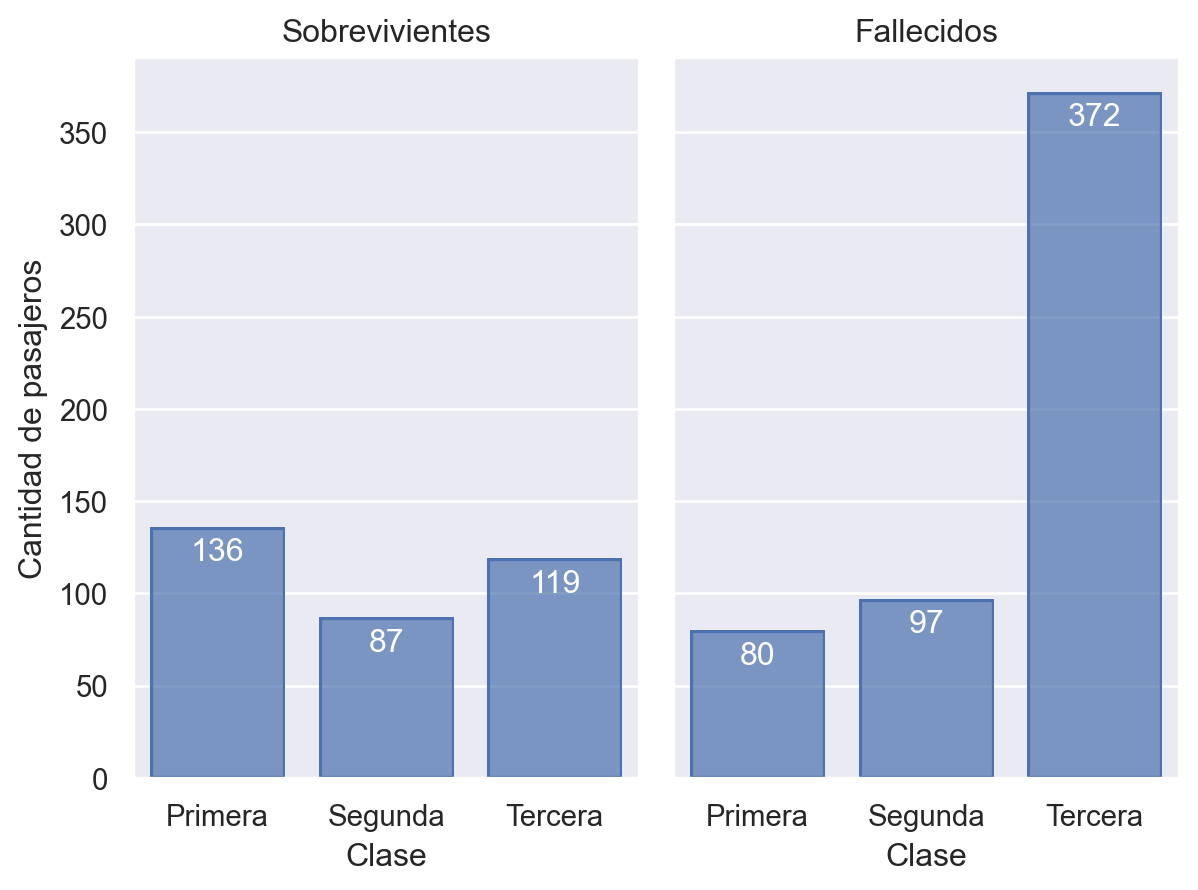

In [ ]:
so.Plot(
    data=data_train.loc[:, ["Clase", "Condicion"]]
    .groupby(by=["Clase", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Clase",
    y="Cantidad",
    text="Cantidad",
).facet(col="Condicion", order=["Sobreviviente", "Fallecido"]).add(so.Bar()).add(
    so.Text(color="white", valign="top")
).label(
    title="{}s".format, y="Cantidad de pasajeros"  # type: ignore
)

### Cantidad de pasajeros por género


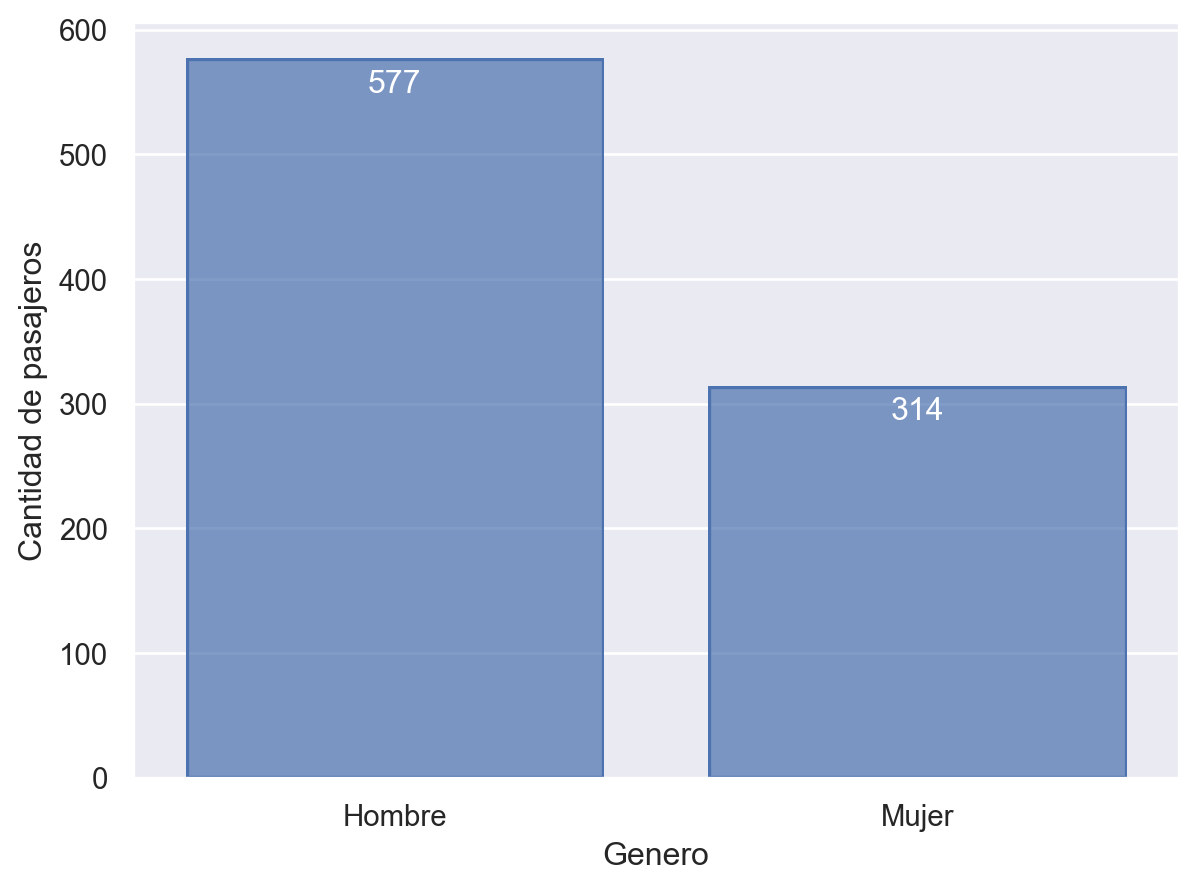

In [ ]:
so.Plot(
    data=data_train.loc[:, ["Genero"]]
    .groupby(by="Genero")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Genero",
    y="Cantidad",
    text="Cantidad",
).add(so.Bar()).add(so.Text(color="w", valign="top")).label(y="Cantidad de pasajeros")

### Cantidad de sobrevivientes por género


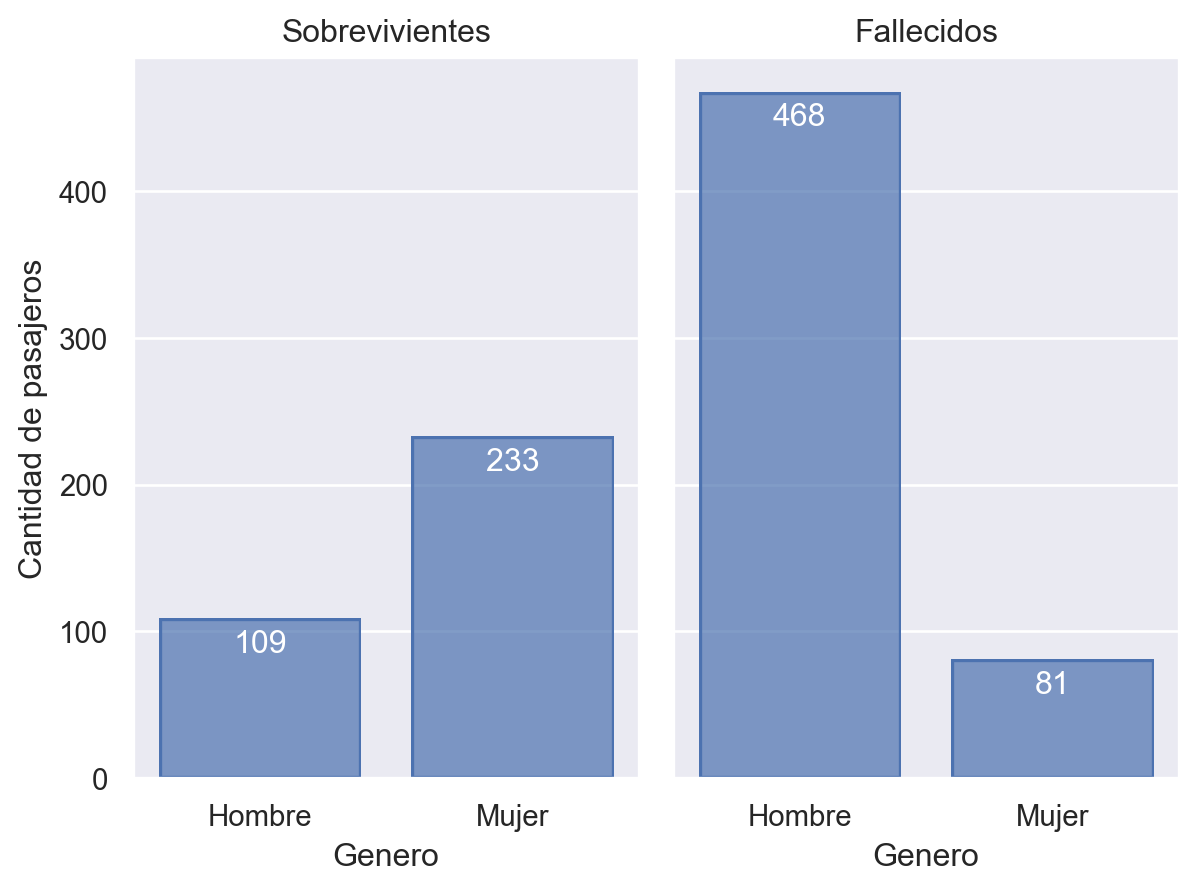

In [ ]:
so.Plot(
    data=data_train.loc[:, ["Genero", "Condicion"]]
    .groupby(by=["Genero", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"}),
    x="Genero",
    y="Cantidad",
    text="Cantidad",
).facet(col="Condicion", order=["Sobreviviente", "Fallecido"]).add(so.Bar()).add(
    so.Text(color="white", valign="top")
).label(
    title="{}s".format, y="Cantidad de pasajeros"  # type: ignore
)

### Cantidad de pasajeros por edad


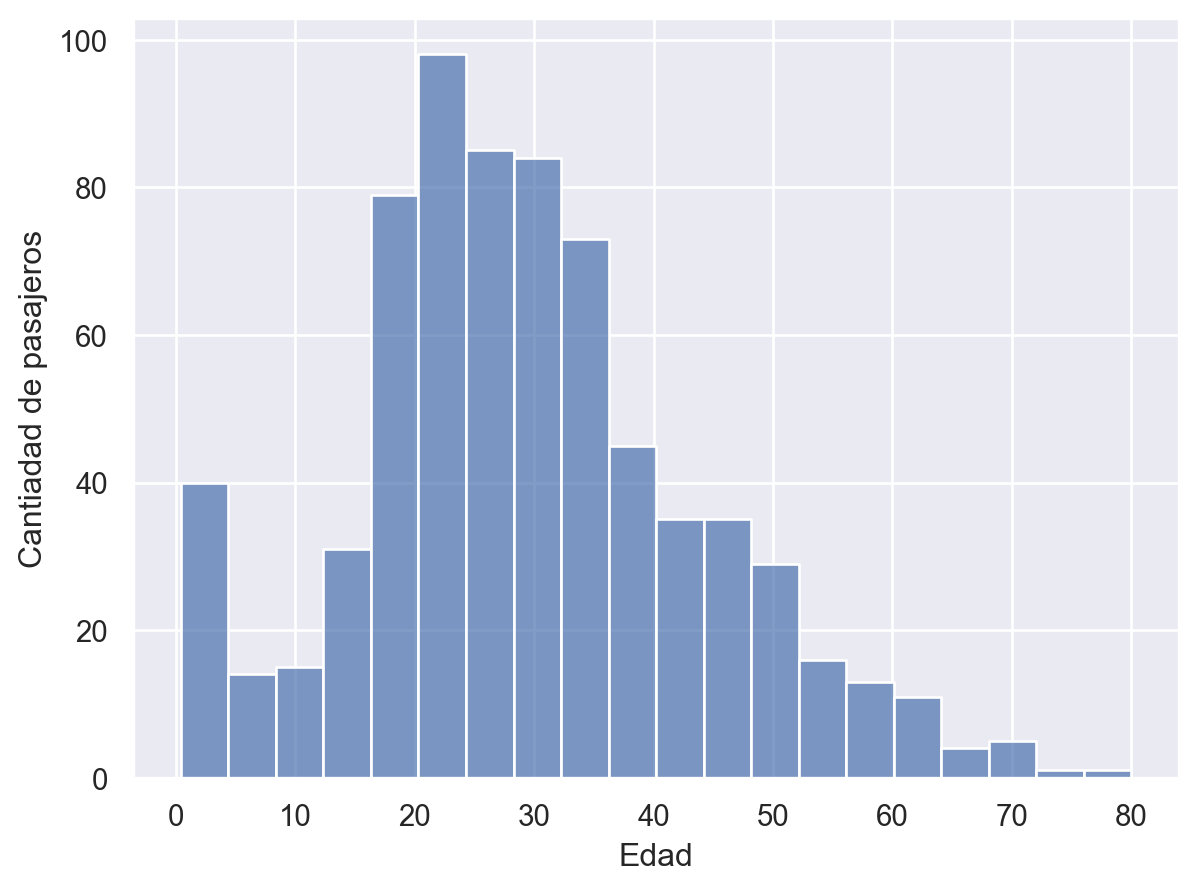

In [ ]:
so.Plot(
    data=data_train.loc[data_train["Edad"].notna(), ["Edad"]],
    x="Edad",
).add(
    so.Bars(), so.Hist(stat="count")
).label(y="Cantiadad de pasajeros")

### Cantidad de pasajeros por rango etario


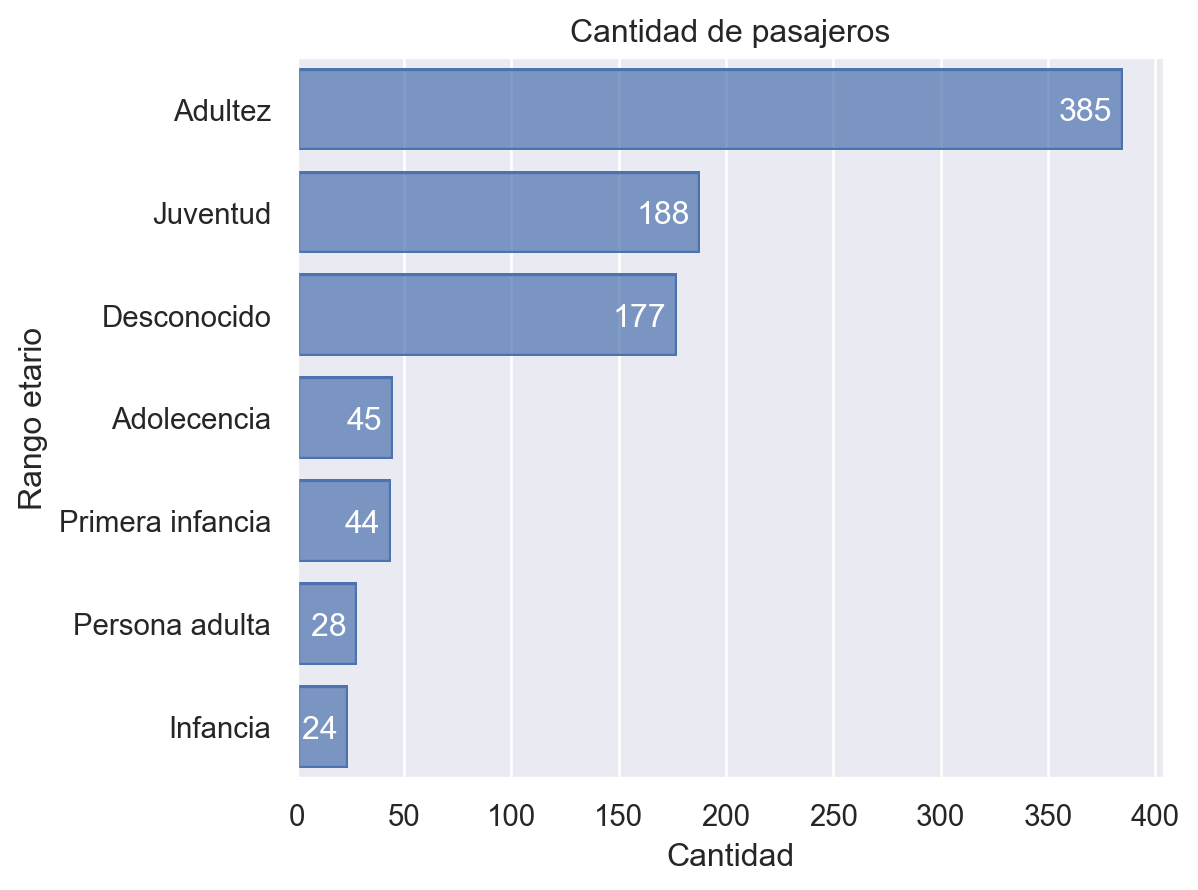

In [ ]:
so.Plot(
    data=data_train.loc[:, ["Rango etario"]]
    .groupby(by="Rango etario")
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
    .sort_values(by="Cantidad", ascending=False),
    x="Cantidad",
    y="Rango etario",
    text="Cantidad",
).add(so.Bar()).add(so.Text(halign="right", color="w"))

### Cantidad de pasajeros sobrevivientes/fallecidos en rangos etarios


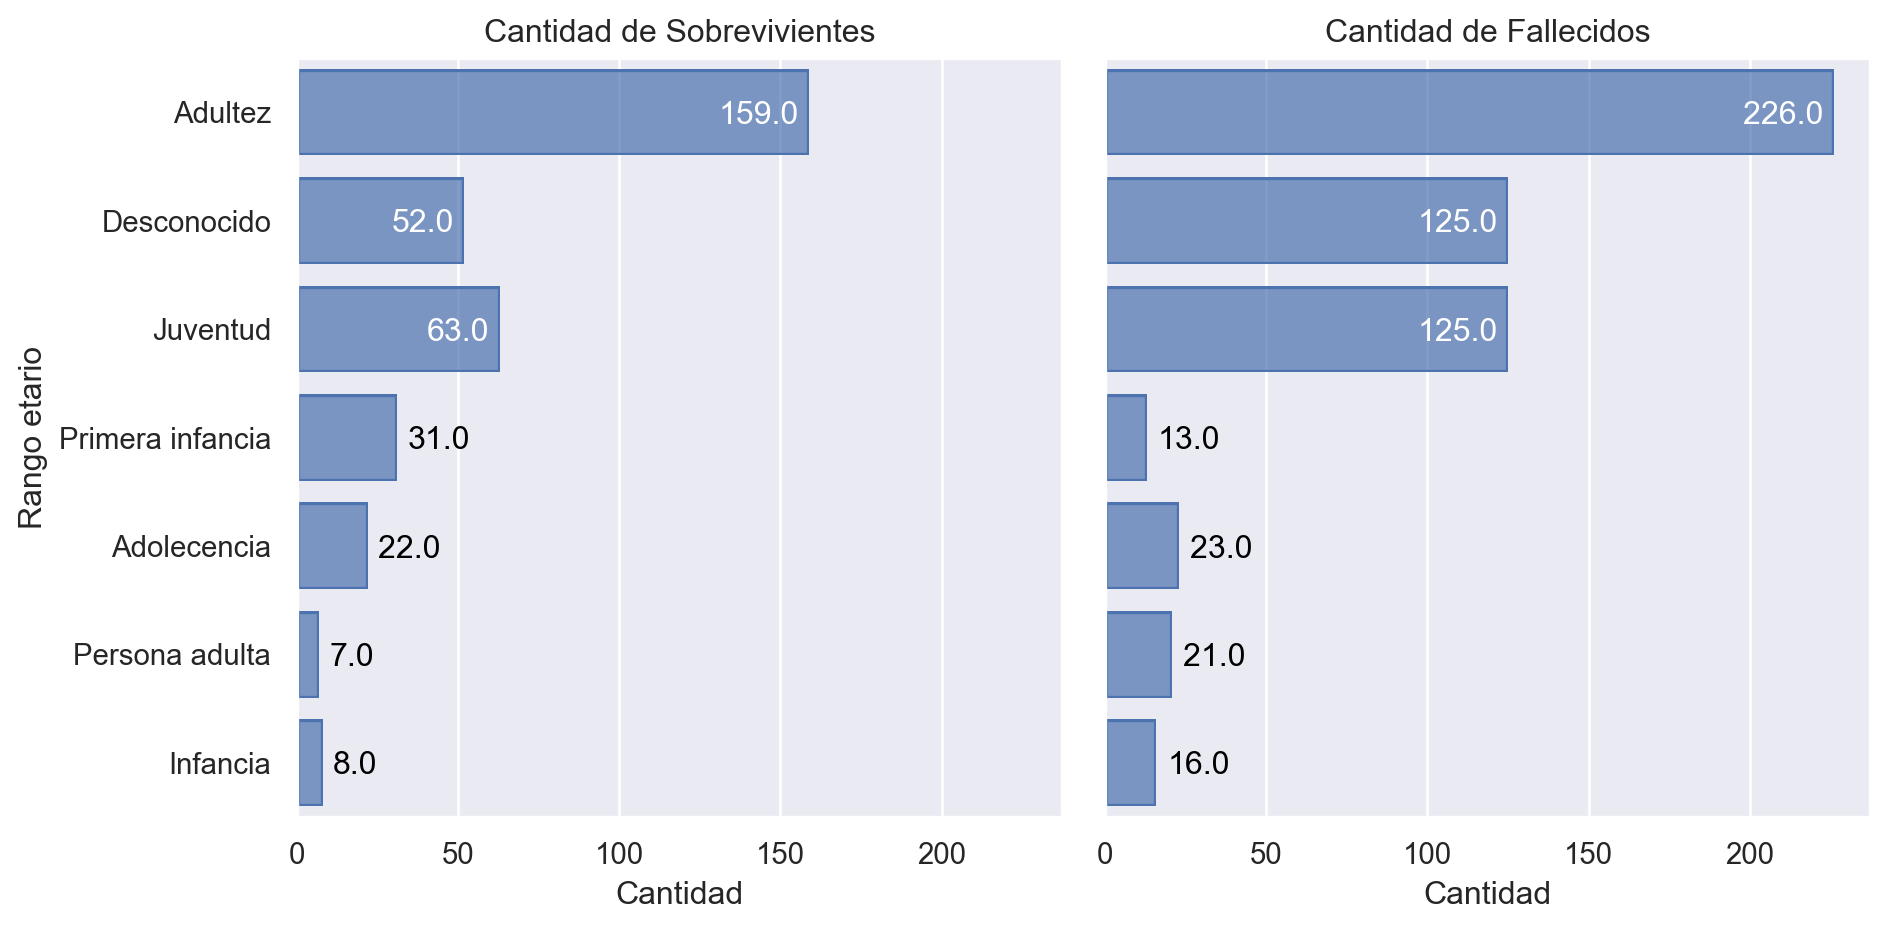

In [ ]:
data_survivors_by_range_age = (
    data_train.loc[:, ["Rango etario", "Condicion"]]
    .groupby(by=["Rango etario", "Condicion"])
    .size()
    .reset_index()
    .rename(columns={0: "Cantidad"})
    .sort_values(by="Cantidad", ascending=False)
)

so.Plot(
    data=data_survivors_by_range_age,
    x="Cantidad",
    y="Rango etario",
).add(
    so.Bar()
).facet(col="Condicion", order=["Sobreviviente", "Fallecido"]).label(
    title="Cantidad de {}s".format  # type: ignore
).add(
    so.Text(color="white", halign="right"),
    data=data_survivors_by_range_age.query("Cantidad > 50"),
    text="Cantidad",
).add(
    so.Text(color="black", halign="left"),
    data=data_survivors_by_range_age.query("Cantidad <= 50"),
    text="Cantidad",
).layout(
    size=(10, 5)
)